This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

This notebook is joint work by Erwan Lecarpentier, Luca Mossina and Emmanuel Rachelson.

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Support Vector Machines (practice session)</div>

# Introduction

In this notebook you will find some data challenges to experiment with SVMs.

Content:
1. [Linear SVMs](#sec1)<br>
1.1 [Let's play](#subsec11)<br>
1.2 [Tune your linear SVM](#subsec12)
2. [SVM with kernels](#sec2)<br>
2.1 [Warm-up: Americans and Atheism  (OPTIONAL)](#subsec21)<br>
2.2 [Back to basics (OPTIONAL)](#subsec22)<br>
2.3 [Kernels](#subsec23)
3. [Application: Binary classification](#sec3)
4. [Application: Multi-label Classification (MLC)](#sec4)

# <a id="sec1"></a> 1. Linear SVMs

The goal of this section is to explore the most basic form of SVM, namely the linear one. We are going to test this method on a toy data set and to play with the hyperparameters in order to get the best classifier.

<div class="alert alert-warning">**Question 1.1**<br>
What is the objective of SVMs?<br>
On which principle is it built? Give an **intuitive** geometrical interpretation.
</div>

Your answer :

<div class="alert-danger"><a href="#answers1" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers1" class="collapse">
SVM is a supervised learning model used for **classification and regression** analysis.<br>
It is built on the idea of **separating the data points by a hyperplane** maximizing the distance between the closest points and the hyperplane.
This distance is called **the margin**.
The points on each side of the hyperplane are then classified with different classes.
</div>
</div>

## <a id="subsec11"></a> 1.1 Let's play

Let's take a toy data set $\{ {x_i, y_i} \}_{i=1}^n$ where $x_i \in \mathbb{R}^2$ is a point and $y_i \in [-1, 1]$ a class.<br>
The code below allows you to load the data and to display it.

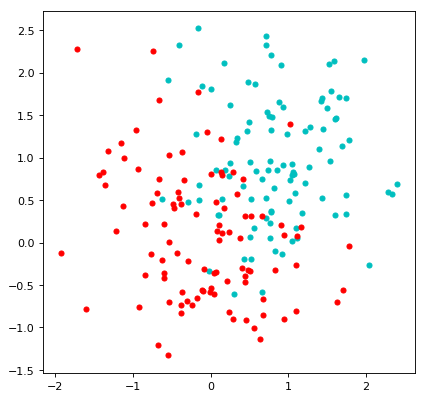

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = (6,6)

csv_file_name="data/data1.csv"
res = np.loadtxt(csv_file_name, delimiter=',')
X = res[:,0:-1]
y = res[:,-1].astype(int)
Xblue = X[y==-1]
Xred  = X[y==+1]
fig = plt.figure(figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')
plt.scatter(Xblue[:,0], Xblue[:,1], c='c', s=20)
plt.scatter(Xred[:, 0], Xred[:, 1], c='r', s=20);

<div class="alert alert-warning">**Question 1.1.1**<br>
Can this data set be completely separated by a straight line?<br>
What kind of technique could be used to train a classifier on this data set?
</div>

Your answer:

<div class="alert-danger"><a href="#answers1-1-1" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers1-1-1" class="collapse">
This data set cannot be completely separated by a straight line as one cannot avoid points of the same class to be on both sides of the line.<br>
To handle this, we can increase the tolerance, that is to say allowing a few points to lie on the wrong side of the hyperplane.
</div>
</div>

Let's apply the SVM method to this dataset. To this purpose, we are going to use scikit-learn, a Python library providing most of the common Machine Learning off the shelf methods including SVM.  
Their documentation page for this method can be found here: http://scikit-learn.org/stable/modules/svm.html

<div class="alert alert-warning">**Question 1.1.2**<br>
Use the class sklearn.svm.SVC provided in scikit-learn in order to train an SVM on the provided data.
Try to display the separating hyperplane on this dataset. You can get inspiration from the SVM course's code.
</div>

SV per class: [42 42]
w_i: [-1.53218817 -1.25477274]
w_0: [1.20117075]
Margin: 1.00988784439265
w^T x0 + w_0: [0.0634874]
w^T x1 + w_0: [-0.26275015]
w^T x2 + w_0: [-0.55188292]


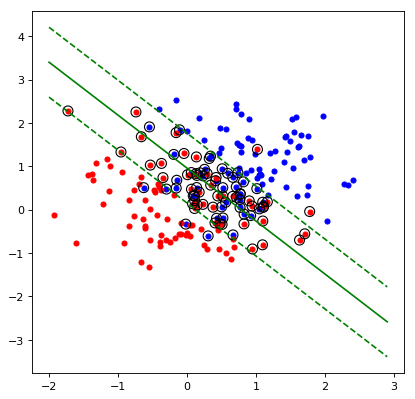

In [25]:
# %load solutions/code1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

from sklearn import svm
mySVC = svm.SVC(kernel='linear')
mySVC.fit(X,y)

# Compute margin and find support vectors
w = mySVC.coef_[0]
w0 = mySVC.intercept_
M = 2. / np.linalg.norm(w)
print("SV per class:", mySVC.n_support_)
print("w_i:", w)
print("w_0:", w0)
print("Margin:", M)
print("w^T x0 + w_0:", np.dot(w,mySVC.support_vectors_[0,:])+w0)
print("w^T x1 + w_0:", np.dot(w,mySVC.support_vectors_[1,:])+w0)
print("w^T x2 + w_0:", np.dot(w,mySVC.support_vectors_[2,:])+w0)

# Plot the separating plane, the margin and the Support Vectors
fig=plt.figure(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(Xblue[:,0],Xblue[:,1],c='b',s=20)
plt.scatter(Xred[:,0],Xred[:,1],c='r',s=20)
XX = np.arange(-2.,3.,0.1)
YY = -(w[0]*XX+w0)/w[1]
plt.plot(XX,YY,'g')
YY = -(w[0]*XX+w0+M)/w[1]
plt.plot(XX,YY,'g--')
YY = -(w[0]*XX+w0-M)/w[1]
plt.plot(XX,YY,'g--')
plt.scatter(mySVC.support_vectors_[:,0], mySVC.support_vectors_[:,1], s=80, edgecolors='k', facecolors='none');


<div class="alert alert-warning">**Question 1.1.3**<br>
In "Support Vector Machine", what are the "support vectors"?
</div>

Your answer :

<div class="alert-danger"><a href="#answers1-1-3" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers1-1-3" class="collapse">
The support vectors are data points that lie directly on the margin, or on the wrong side of the margin for their class. They _support_ the maximal margin hyperplane in the sense that if these points were moved slightly then the maximal margin hyperplane would move as well.
</div>
</div>

## <a id="subsec12"></a> 1.2 Tune your linear SVM

One of the parameters of the class sklearn.svm.SVC is the penalty parameter $C$ of the error term. It quantifies the missmatch-tolerance that is allowed when fitting an SVM model to the data. The smaller, the bigger is the tolerance. In our case, having such a tolerance is necessary because the data cannot be separated by a straight line, thus some point have to be on the wrong side of the separating hyperplane.

$C$ is an hyperparameter, which means that it needs to be tuned for the algorithm to yield good results. This is a common concern in Machine Learning, as a result, techniques have been designed in order to select the best hyperparameters. The most common technique is probably the cross validation. Roughly it consists in:

    0) dividing the data set into training and test sets;

    1) selecting a value of the hyperparameters;

    2) train the model with the training set;

    3) test the model with the test set and compute a performance indicator;

    4) go back to 1) with another value of the hyperparameters.

When the procedure is finished, simply choose the hyperparameters yielding the best performance. We are now going to perform k-fold cross validation - which is a certain type of cross validation - on our problem, in order to identify the best value of $C$.
For more details, see the wikipedia article: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

For more details on the type of indicators used in step 3), see https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers<br>
The accuracy, refered to as ACC in the article, may be a good start (and most scikit-learn classifiers implement it directly via the [`score` function](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)).

<div class="alert alert-warning">**Question 1.2.1**<br>
Fill the code below in order to find the best value of the hyperparameter $C$.
</div>

In [33]:
C = np.linspace(0.1,50,100) #[0.001, 0.01, 0.1, 1.0, 10, 25, 30, 42, 100, 1000] # Tested values of C
k = 20 # k-fold CV: number of subsets
n = int(len(X)/k) # length of subsets

Best C: 4.636363636363637


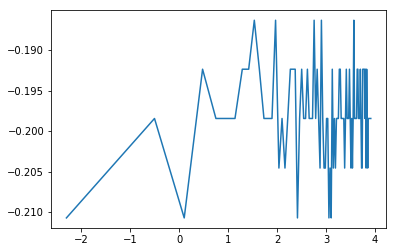

In [40]:
# %load solutions/code2.py
### WRITE YOUR CODE HERE - implement your own version of k-fold cross-validation.
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

from sklearn.utils import shuffle
X, y = shuffle(X, y)

def split_data(X, y, start, end):
    X_train = np.concatenate((X[:start], X[end:]), axis=0)
    y_train = np.concatenate((y[:start], y[end:]), axis=0)
    X_test  = X[start:end]
    y_test  = y[start:end]
    return X_train, y_train, X_test, y_test

accuracy = []

for c in C:
    accuracies = []
    X, y = shuffle(X, y)
    for i in range(k):
        X_train, y_train, X_test, y_test = split_data(X, y, i*n, (i+1)*n)
        mySVC = svm.SVC(kernel='linear', C=c)
        mySVC.fit(X_train, y_train)
        acc = mySVC.score(X_test, y_test)
        accuracies.append(acc)
    accuracy.append(np.mean(accuracies))
    
#for acc, c in zip(accuracy, C):
#    print(c, "\t --> \t", acc)

plt.plot(np.log(C),np.log(accuracy));

print("Best C:", C[np.argmax(accuracy)])


<div class="alert alert-warning">**Question 1.2.2**<br>
What is the best value of $C$ among the proposed ones?<br>
What can you expect from the curve of the accuracy as a function of $C$ if you used a finer meshing for $C$?
</div>

Your answer :

<div class="alert-danger"><a href="#answers1-2-2" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers1-2-2" class="collapse">
The best values of $C$ are in $[10,25]$ they are equivalent.
<br>
With a finer meshing for $C$, we expect to see a piecewise constant function as we have a finite data set. Each jump of the function corresponds to the addition / removal of a new vector in the set of the misclassified points.
</div>
</div>

# <a id="sec2"></a> 2. SVMs with kernels

In [43]:
# === imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

## Binary Classification

The natural application of SVM methods is that of binary classification.

## <a id="subsec21"></a> 2.1 Warm-up: Americans and Atheism  (OPTIONAL)

**SCOPE**: warm-up, revise and challenge yourself with a simple example.
    - MAXIMUM TIME: 10 minutes, afterwards look at the proposed solution.

Let us find out how americans tolerated atheists in 1976.
The dataset is described as follows:

```
Dataset:  atheist.dat
Source: E. Filsinger (1976). "Tolerance of Non-Believers: A Cross-Tabular  and Log Linear Analysis of Some Religious Correlates," Review of Religious  Research, Vol.17, #3, pp.232-240
Description: Church Attendance and Tolerance for Atheists for survey of 1221 people.

Variables/Columns 
Church Attendance  8  /* 1=Never, 2=Yearly, 3=Monthly, 4=Weekly */
Tolerance for Atheists  16 /* 1=Low, 2=High  */
```

### 2.1.1 Retrieve and understand data

The file is available online at: http://users.stat.ufl.edu/~winner/datasets.html

<div class="alert alert-warning">**Question 2.1.1.1**<br>
Import the data as a pandas dataframe. No cheating, it can be done with a pandas function (one line).
Your dataframe should have 1221 rows and 2 columns, which you'll name respectively 'attendance', 'tolerance'.
<br><br>
Plot the data. 
</div>

(1221, 2) # <-- (nrow, ncols) 

     attendance  tolerance
121           1          2
91            1          2
183           2          2
53            1          2
624           3          2


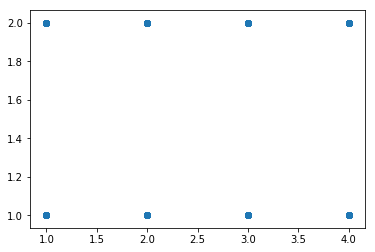

In [44]:
# %load solutions/code3.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

import matplotlib.pyplot as plt

data_file = 'data/atheist.dat'
df = pd.read_csv(data_file, sep='\s+',
                 header=None,
                 names=['attendance', 'tolerance'])

print(df.shape, "# <-- (nrow, ncols)", "\n")
print(df.sample(5)) # print random rows

plt.scatter(df['attendance'], df['tolerance'])


It doesn't look like the fancy figures we saw in class, does it?

### 2.1.2 Run SVM. Does it make sense?

<div class="alert alert-warning">**Question 2.1.2.1**<br>
First of all, what can we learn having a strong look at the data and their description?
<br>
Do we have categorical, binary, continuous data?
</div>

Your answer :

<div class="alert-danger"><a href="#answers2-1-2-1" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers2-1-2-1" class="collapse">
The data take their values in a discrete space, hard to interprete numerically as well as practically. We could have imagined continuous data for the same descrition purpose.
</div>
</div>

These are fundamental questions, which you'll ask yourselves for the rest of your (data science) life.
Often, collegues or clients have no idea about these formalities; they have a problem and they ask you to provide a good enough solution.

Let the fun begin. We want to do SVM classification with scikit-learn, but we've already forgotten its api!  
Thou shalt fear no more, the word of the Doc is with us:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

We are doing SVM classification, could it be: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC ?
Let us copy-paste the example at the bottom of the page. Run the following:

In [45]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Wait, what are `X` and `y`? 
Let us take a moment to ponder on how to name things.  
For sure, "x" and "y" mean something to all those with scientific background.  
Often, however, when we do some ML modeling, we are having a data-dialogue with someone, ourselves included.  
Do the favor to the "you" of the future and use a meaningful description for the variables; code is mostly meant to be read.

In [47]:
attend = df['attendance'] # WARNING: you are passing a reference.
toler  = df['tolerance']

clf = SVC(gamma='auto')
clf.fit(X = attend.reshape(-1, 1), # reshape necessary because data is one-dimensional
        y = toler) 

/home/emmanuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Something just went horribly wrong.  
He's telling us something about ```"Expected 2D array, got 1D array instead: [...]"```  
After some intense googling, stackoverflow.com gives us a hint:  
https://stackoverflow.com/questions/38657138/scikits-learn-svm-1-dimensional-separating-hyperplane

Let us add a dummy column of zeros:

In [48]:
# df['zeros'] = 0 # dummy zeros

df  = df.sample(frac=1) # shuffle rows to avoid introducing bias
# print(df.iloc[0:5,])

NTRAINS = 800 # out of 1221

# tr = df.iloc[0:NTRAINS,:] # training data
# te = df.iloc[NTRAINS: ,:] # testing data

# assert: make sure now rows were lost or doubled
# assert tr.shape[0] + te.shape[0] == df.shape[0]

# features = ['attendance', 'zeros']
attend = df[features]
toler  = df['tolerance']

from sklearn.svm import LinearSVC
clf = LinearSVC(tol=1e-5) # linear
# __uncomment__ if you want to try with nonlinear SVM:
# clf = SVC(gamma='auto')

clf.fit(X=attend[0:NTRAINS], y=toler[0:NTRAINS]) 

y_pred = clf.predict(attend[NTRAINS:])
y_test = toler[NTRAINS:].tolist()

errors = np.zeros(len(y_pred))

for i in range(len(errors)):
    if y_pred[i] != y_test[i]:
        errors[i] = 1
        
er_rate = np.sum(errors) / len(errors)
print("error rate:", er_rate)
print(" --> about ", int(er_rate*100), "% of the predictions were not correct.")

     attendance  tolerance  zeros
680           3          2      0
714           3          2      0
28            1          2      0
300           2          2      0
591           2          1      0
error rate: 0.39429928741092635
 --> about  39 % of the predictions were not correct.


*Campeones*, we made it, sklearn is no more mad at us.  
Did we get anything interesting? Are we learning something at all?

**--> Lesson learned: some data are more svm-able than others**

Although SVM's are among the best tools in machine learning, we cannot expect it to work great in all cases.  
Much more could be done, tuning parameters or changing kernels, but let's go on to more interesting data

#### Bonus: beware of the Python   
Let's look at what done just before:

In [ ]:
# execute and ignore the following two lines
import copy            # IGNORE
dF = copy.deepcopy(df) # IGNORE

mangueira = dF['attendance'] # WARNING: you are passing a reference.
portela   = dF['tolerance']

# See how dangerous things can get:
print(mangueira[0:2])
mangueira[0:2] = 666, 666
print(dF.iloc[0:2]) # original df is modified!!

# Possible solution:
import copy
mangueira = copy.deepcopy(df['attendance'])
# all data is hard copied in new struct: can be a problem, if data is big

Let us move to more serious matters.

## <a id="subsec22"></a> 2.2 Back to basics (OPTIONAL)

After our previous little experiments, it is time to start gaining some insight into the use of kernels.  
But what _is_ a kernel? Can we get an intuitive image of what these kernels are doing?

In [ ]:
NPOINTS = 100
COLORS  = ['pink', "green"]

# Generate toy data
x = np.random.rand(NPOINTS)
y = np.ones(NPOINTS, dtype=int)
for i in range(NPOINTS):
    if x[i] < 0.0666 or x[i] > 0.666:
        y[i] = -1
        
# Plot toy data: we have a one-dimensional problem
plt.scatter(x[y==-1], np.zeros(len(x[y==-1])), color=COLORS[0])
plt.scatter(x[y== 1], np.zeros(len(x[y==1])), color=COLORS[1])
plt.xlabel('x');plt.ylabel('y')
plt.show()

A simple linear separator, a point in this example, cannot be found to separate the data.  
However we can easily see that the limit between the pink and the green regions are well defined.  
How can we **transform** the data to make this linear separation possible? We can apply a function $f : x_i \mapsto f(x_i)$ on each data point. Such function is called **feature** of the data.  
Let us try with a polynomial.

In [ ]:
a, b, c = 1, 1, 1
feature = a*x**2 + b*x + c

plt.scatter(x[y==-1], feature[y==-1], color=COLORS[0])
plt.scatter(x[y== 1], feature[y== 1], color=COLORS[1])
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
a, b, c = -8, 1, 2
feature = a*x**2 + b*x + c

plt.scatter(x[y==-1], feature[y==-1], color=COLORS[0])
plt.scatter(x[y== 1], feature[y== 1], color=COLORS[1])
plt.xlabel('x')
plt.ylabel('f(x)')

<div class="alert alert-warning">**Question 2.2.1**<br>
Copy the code above and play manually with the parameters in order to make the features separable.
</div>

In [ ]:
a, b, c = ?,?,?
feature = a*x**2 + b*x + c

colors = ['pink', "green"]

plt.scatter(x[y==-1], feature[y==-1], color=COLORS[0])
plt.scatter(x[y== 1], feature[y== 1], color=COLORS[1])
plt.xlabel('x')
plt.ylabel('f(x)')

height = 0.90
plt.plot([0,1], [height, height], color='red')
height = 0.95
plt.plot([0,1], [height, height], color='blue')
height = 1.00
plt.plot([0,1], [height, height], color='orange')
plt.show()

Wouldn't be nice to have an algorithm doing that for us?

## <a id="subsec23"></a> 2.3 Kernels

Now let's play with the kernels in scikit-learn. As before, we are going to use the sklearn.svm.SVC class in order to fit SVMs to some data models. The 'kernel' attribute of the class allows you to use different kernels for the used models.

Below are displayed several data sets.

In [ ]:
def plot_data(csv_file_name):
    fig_size = (6, 6)
    res = np.loadtxt(csv_file_name, delimiter=',')
    X = res[:,0:-1]
    y = res[:,-1].astype(int)
    Xblue = X[y==-1]
    Xred  = X[y==+1]
    fig = plt.figure(figsize=fig_size, dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(Xblue[:,0], Xblue[:,1], c='c', s=20)
    plt.scatter(Xred[:, 0], Xred[:, 1], c='r', s=20)

plot_data("data/data2.csv")
plot_data("data/data3.csv")
plot_data("data/data4.csv")

<div class="alert alert-warning">**Question 2.3.1**<br>
Find a good kernel for each one of the data set above.<br><br>
**Hint 1**: you can reuse the `plot_SVC` function provided in class that plots the decision frontier of the model and the data set $(X, y)$.<br><br>
**Hint 2**: sometimes, the default kernels provided by scikit-learn are not enough. In this case, you can design a special kernel for your problem using the a callable function. See [here](http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html) for an example. Recall that $k(x,x')$ measures how close $x$ and $x'$ are in the kernel's projection space: keeping this in mind can help you shape a good projection first, and then deriving a good kernel.
</div>

In [ ]:
from myplot import plot_SVC

def load_data(filename):
    res = np.loadtxt(filename, delimiter=',')
    X = res[:,0:-1]
    y = res[:,-1].astype(int)
    return X, y

In [ ]:
# %load solutions/code4.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


<div class="alert alert-warning">**Question 2.3.2**<br>
Can you hint a method for robustly selecting the best kernel and or the hyperparameters of the kernel function.
</div>

Your answer :

<div class="alert-danger"><a href="#answers2-3-2" data-toggle="collapse">**Correction (click to unhide):**</a><br>
<div id="answers2-3-2" class="collapse">
We could use cross validation to do this selection.
</div>
</div>

# <a id="sec3"></a> 3. Application: Binary classification

We now try to do binary classification on the Mushrooms data set loaded below:

In [ ]:
data = pd.read_csv("data/mushrooms.csv")
data.head(6)

There are 2 classes, namely $y_i \in \{ e, p \}$ and many weird values for the elements of $x_i$.<br>

<div class="alert alert-warning">**Question 3.1**<br>
Use LabelEncoder from sklearn.preprocessing in order to turn the elements of $x_i$ into numerical values.
</div>

In [ ]:
# %load solutions/code5.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


<div class="alert alert-warning">**Question 3.2**<br>
Use StandardScaler from sklearn.preprocessing in order to scale the data.
</div>

In [ ]:
# %load solutions/code6.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


<div class="alert alert-warning">**Question 3.3**<br>
Now train an SVM classifier on the data. Try several different kernels and measure the accuracy of your predictor.<br>
**Hint:** You can split your data set into a training and testing set using train_test_split from sklearn.model_selection
</div>

In [ ]:
# %load solutions/code7.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


# <a id="sec4"></a> 4. Application: Multi-label Classification (MLC)
This is a hard one.

We'll see an application which is both harder and less common than binary classification, that of **multi-label classification** (MLC).  
Given a list of possible labels, the problem consists in finding one **or more** labels associated to a data point.  
For instance, imagine extracting the keywords from a newspaper article. Possibly many labels can be associated to a text; or for example classifing the elements composing an image

Given a set of labels $\mathcal{L} = \{l_1, l_2, ..., l_k\} \in \{0,1\}^k$, we want to map elements of a feature space $\mathcal{X}$ to a subset of $\mathcal{L}$:  

$$h : \mathcal{X} \longrightarrow \mathcal{P}(\mathcal{L})$$

The two typical approaches for such problems are known as **Binary Relevance** (BR) and **Label Powerset** (LP).  

 - BR: each label in $\mathcal{L}$ is a binary classification problem, $h_{i} : \mathcal{X} \longrightarrow l_{i}, l_{i} \in \{0,1\}, i = 1, ..., |\mathcal{L}|$.

 - LP: transforms a problem of MLC into one of multiclass classification, mapping elements $x \in \mathcal{X}$ directly to $s \in \mathcal{P}(\mathcal{L})$.  
 This method becomes rapidly inapplicable as the number of $s$ grows exponentially.
 
 Many other variations exist, but for today we'll focus on BR, the most straightforward to implement.


<div class="alert alert-warning">**Exercice**<br>
<ul>
<li> find a suitable package to load the file at `data/yeast.arff`.  <br>
    Hint: [`scipy.io`](https://docs.scipy.org/doc/scipy/reference/io.html) and _read the doc_.
<li> Store the data in a pandas dataframe.<br>
    Hint: columns of classes will be encoded as 'utf-8', we need integers, look for 'str.decode('utf-8')'
<li> check dataset: you should have 2417 samples $\times$ 117 columns (103 features + 14 labels)
</ul>
</div>

In [ ]:
# %load solutions/code8.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


<div class="alert alert-warning">**Exercice**<br>
<ul>
<li> Manually, fit a SVM classifier for each label in the dataset
<li> Apply a cross-validation of 60 ∕ 40: 60% of datapoints to train the model, 40% to test it  <br>
   Remember: it is good practice to **randomly shuffle** the data, in case the data are ordered w.r.t. some data-dependent criterion.
<li> Report some performance measure
</ul>
</div>

In [ ]:
# %load solutions/code9.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


You probably wondered _how_ to evaluate the performance of a MLC algorithm: well spotted, this is no easy task.   
Evaluating classification performance can be challenging in binary classification, in multi-label classification this becomes harder and more ambiguous.

The best starting point is the _Hamming_ loss. See for instance:
 - https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics

This measures the average number of operations it would take to turn the vector of predictions $\mathbf{y}$ into the correct one.
$$ H_L  = 1 - \frac{1}{N} \sum_{i=1}^{N}
						\left(\frac{1}{L} \sum_{k=1}^{L}
							{I}\left(y_k^i = \widehat{y}_k^i\right)\right).$$

<div class="alert alert-warning">**Exercice**<br>
<ul>
<li> For 5 minutes: challenge yourself to speed-code a simple hamming loss function; it is useful, we promise.
<li> **AFTER** 5 minutes, feel free to cheat and read the sklearn doc
<li> from the Doc, look for other metrics and run them (accuracy, precision, recall, etc.). For reference, you can have a rapid look at the tables in:  <br>
   page 349, https://link.springer.com/content/pdf/10.1007%2Fs10994-011-5256-5.pdf
</ul>
</div>

In [ ]:
# === Hints
def hamming_loss(predictions_list, observations_list):
    assert len(predictions_list) == len(observations_list)
    
    # TODO
    
    return loss

In [ ]:
# === Solution

from sklearn.metrics import hamming_loss
print("Hamming Loss:", hamming_loss(y_test["Class1"], y_pred_01))

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test["Class1"], y_pred_01))

# ...

Two important factors to keep in mind are the _Label Density_ and the _Label Cardinality_ .  

Let us denote by $\textbf{y}^i$ and $\textbf{{y'}}^i$ respectively the observed  and predicted target vectors for the $i$-th row.

$ LCard = \frac{1}{N} \sum_{i=1}^{N} \left|\textbf{y}^{i} \right|$, tells us about the multi-labelness of data, yielding the average number of labels per target across the dataset.  

$ LDens = \frac{LCard}{|\mathcal{L}|} \times 100 = \frac{1}{N |\mathcal{L}|} \sum_{i=1}^{N} \left|\textbf{y}^{i} \right| \times 100$, expresses what proportion of the available labels are, on average, associated to a data point $\textbf{x}$.  
We can use these to measure how sparse how our label vectors are.  
Take a vector $y = [l_1, l_2, \dots, l_{100}] $ in which only 2 of the labels take value 1: if we completely miss our prediction, and predict 2 other labels, 96 out of 100 labels will be "correctly" predicted as zero.  

In MLC, it is good practice to use multiple metrics and compare them: the challenge is more complicated and focusing solely on one source of information could hide erros.

<div class="alert alert-warning">**Exercice**<br>
Measure the `LCard` and `LDens` of your predictions on  `yeast.arff`
</div>

In [ ]:
def label_cardinality(dataset):
    # TODO
    pass

def label_density(dataset):
    # TODO
    pass

We have seen how powerful and versatile SVMs are. In MLC meta-algorithms, we have the concept of _base classifier_; this is the actual supervised learning tool that is giving us an estimate.  
Often, the SVM is the best performing one, thus the default algorithm for many libraries.

**Mini-challenges** :  

<div class="alert alert-warning">**Step 1**<br>
Read the [documentation of sklearn on MLC](http://scikit-learn.org/stable/modules/multiclass.html) and experiment with different algorithms (no more manual coding).<br>
We suggest you first try the **Classifiers Chains** (CC): see resources below.  <br>
It is one of the reference meta-algorithms in MLC, and it gives its best when SVM are used as _base classifier_.
</div>

Strong with your intuitions on **metrics** (hamming loss, accuracy, etc.), **model validation** (CV, k-fold, etc.) and different **MLC architectures** (BR, CC), you are equiped with the right tools to show off your data-science awereness:

<div class="alert alert-warning">**Step 2**<br>
Compare different methods on a **new dataset**:  http://mulan.sourceforge.net/datasets-mlc.html .  <br>
From the list above, we suggest you try either on `emotions`, `scene` or `music`. They are simple enough to get you started rapidly and you can conveniently find them in the `data` directory. Inspect carefully the datasets and change accordingly the names of the classes and of the features.<br>
Suggestion: aim for a results table where you can cross at least 2 MLC algos (CC, BR, etc.) with their respective Hamming Loss, accuracy etc.
</div>

<div class="alert alert-warning">**Step 3**<br>
Reflect on the weak points of SVM and the MLC approaches you have tested.  <br>
Hint: what if we had 300 labels? How computationally costly would it be to fit 300 independent SVM? maybe with hundreds of features and tens of thousand of data points? <br>
Hint: wht about label interdependency in BR approaches?<br>
During the next weeks, we'll explore different paradigms in supervised learning. Your spectrum of choices will broaden and consequently your options: harder choices, greater benefits. <br>
</div>
 
 Resources:
  - Metrics: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
  - Model Validation:
    - http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    - http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
  - MLC architectures:
    - https://en.wikipedia.org/wiki/Classifier_chains
      - sklearn http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain
      http://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html#sphx-glr-auto-examples-multioutput-plot-classifier-chain-yeast-py
      - specialized MLC python package: http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain
    - https://en.wikipedia.org/wiki/Multi-label_classification
  
It is important, as a data scientist, to develop a strong intuition.  
You have seen cases where model interpretation is most important (stats, linear regression); this will not be one of them.  
SVM are mostly used as powerful prediction tools. The intuition will be rather in **when** to use it (big/small data, etc) and **how** to use it (tuning parameters, choosing kernels).
 

#### Mini-challenge n. 1 

In [ ]:
# %load solutions/code10.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).


#### Mini-challenge n.2: model comparison

In [ ]:
### Just a few lines to get you started but you're on your own for this one!

# === Hints: starting with a new dataset
import pandas as pd
import scipy
from scipy.io import arff

# Load scene.arff via dedicate scipy.io function
raw_data_2, metadata_2 = arff.loadarff('data/scene.arff')
print("nrows:", len(raw_data_2))    # 2417
print("ncols:", len(raw_data_2[0])) #  117

df2 = pd.DataFrame(raw_data)
print("dimensions:", df2.shape)           # -> (2417, 117)
print(df.head(5))         # for free, we get column names
print(type(df.iloc[0,0])) # -> <class 'bytes'> ## we want to have plain {0,1} integers

classes_list = [name for name in df2.columns if "Class" in name]
print(classes_list)  # -> ['Class1', 'Class2', ... , 'Class14']